In [ ]:
#using https://arc-alkali-rydberg-calculator.readthedocs.io/en/latest/ARC_3_0_introduction.html#Preliminaries:-general-note-on-using-ARC-with-Alkaline-Earths
# first we install most recent upgrade of arc
!pip install ARC-Alkali-Rydberg-Calculator --upgrade --no-cache-dir

In [3]:
from arc import *

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [23]:
atom = Calcium40()
print("QD")
atom.getQuantumDefect(6,3,3,0)



QD


0.09128082390826674

In [8]:
atom = Calcium40(preferQuantumDefects=True)
atom.getEnergy(56, 2, 2, s=0)

-0.004338490588169279

Found  2254  states.
Generating matrix...
100%

Finding eigenvectors...
100%

plotting...


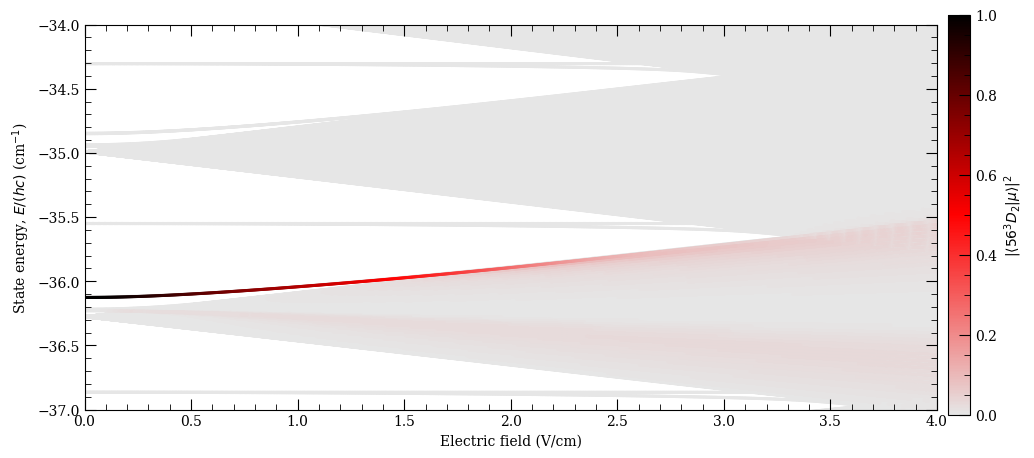

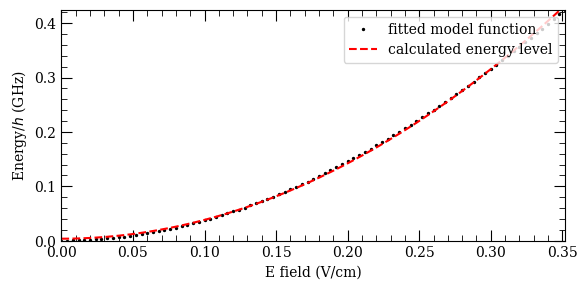

-6934.87098 MHz cm^2 / V^2 


In [20]:
## Stark Map

calc = StarkMap(Calcium40())

# Target state
n0 = 56
l0 = 2
j0 = 2
mj0 = 0
# Define max/min n values in basis
nmin = n0 - 7
nmax = n0 + 7
# Maximum value of l to include (l~20 gives good convergence for states with l<5)
lmax = 55

# Initialise Basis States for Solver : progressOutput=True gives verbose output
calc.defineBasis(n0, l0, j0, mj0, nmin, nmax, lmax, progressOutput=True, s=1)

Emin = 0.0  # Min E field (V/m)
Emax = 4.0e2  # Max E field (V/m)
N = 1001  # Number of Points

# Generate Stark Map
calc.diagonalise(np.linspace(Emin, Emax, N), progressOutput=True)
# Show Sark Map
calc.plotLevelDiagram(progressOutput=True, units=0, highlightState=True)
calc.ax.set_ylim(-37,-34 )
calc.showPlot(interactive=False)
# Return Polarizability of target state
print(
    "%.5f MHz cm^2 / V^2 "
    % calc.getPolarizability(showPlot=True, minStateContribution=0.9)
)

<>:12: SyntaxWarning: invalid escape sequence '\d'
<>:12: SyntaxWarning: invalid escape sequence '\d'
C:\Users\samdi\AppData\Local\Temp\ipykernel_21972\1195730204.py:12: SyntaxWarning: invalid escape sequence '\d'
  axes.set_ylabel("Quantum Defect $\delta_{n\ell j}$")


Text(0.5, 1.0, 'Ca Quantum Defects')

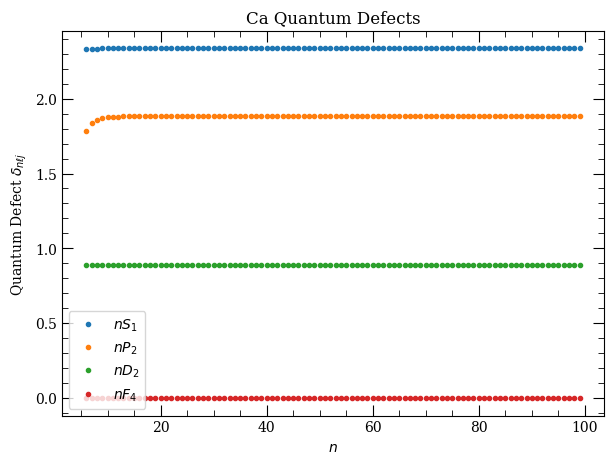

In [24]:
n = np.arange(6, 100, 1)

## a noter que ici c'est sans le calcium modifie, donc peu d'info.

# Plot Quantum Defects of Cs
fig, axes = plt.subplots(1, 1, figsize=(7, 5))

axes.plot(n, atom.getQuantumDefect(n, 0, 0), ".", label="$nS_{1}$")
axes.plot(n, atom.getQuantumDefect(n, 1, 1), ".", label="$nP_{2}$")
axes.plot(n, atom.getQuantumDefect(n, 2, 0), ".", label="$nD_{2}$")
axes.plot(n, atom.getQuantumDefect(n, 3, 1), ".", label="$nF_{4}$")
axes.legend(loc=0)
axes.set_xlabel("$n$")
axes.set_ylabel("Quantum Defect $\delta_{n\ell j}$")
axes.set_title("Ca Quantum Defects")

 Grace au papier de Gallagher, on peut essayer de trouver des quantum defect pour des l plus grands que ce que l'on a jusqu'à présent. Dans ce papier, il est presente une determination de l'energie par une perturbation. On a alors E = E_h - W, ou E_h est l'energie de l'atome d'hydrogene. La formule de l'energie d'atomes de Rydberg n'est pas utilise MAIS on peut simplement faire une equivalence entre ces deux formules pour determiner les QD pour les niveaux qui nous interesses. 
 


$$ E = - \frac{1}{2n^2} - W_{pol,nl} = - \frac{1}{2(n-\delta_{nl})^2}  $$ 
$$ W_{pol,nl}=-\frac{1}{2}k_d\alpha_d \langle r^{-4} \rangle _{nl} - \frac{1}{2}k_q \alpha_q \langle r^{-6} \rangle _{nl}$$

On va utiliser les valeurs présentes pour le plus haut n que l'on ait a disposition en se disant que pour les niveaux qui nous interesses, sa valeur n'en sera pas trop eloignee (les valeurs ne changent pas enormement). Pour montrer que cela n'affecte pas trop, on pourrait faire un graphique des valeurs de k_d,... pour chaque n et faire une regression lineaire par exemple.

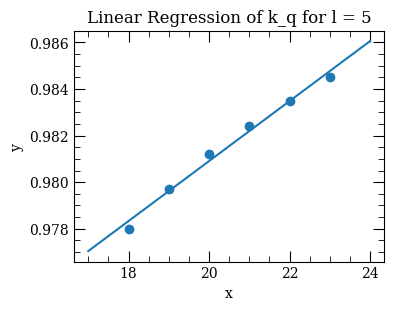

In [14]:
from sklearn.linear_model import LinearRegression
y = np.array([0.9780, 0.9797, 0.9812, 0.9824, 0.9835, 0.9845])
y = y.reshape(-1, 1)  # transforme en tableau (n, 1)

x = np.array([18, 19, 20, 21, 22, 23])
x = x.reshape(-1, 1)  # transforme en tableau (n, 1)


model = LinearRegression()
model.fit(x, y)

x_new = np.linspace(17, 24)
y_new = model.predict(x_new[:, np.newaxis])

plt.figure(figsize=(4, 3))
ax = plt.axes()
ax.scatter(x, y)
ax.plot(x_new, y_new)

ax.set_xlabel('x')
ax.set_ylabel('y')

ax.axis('tight')
plt.title("Linear Regression of k_q for l = 5")
plt.show()

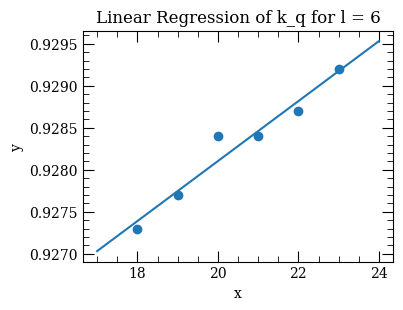

In [15]:
y = np.array([0.9273, 0.9277, 0.9284, 0.9284, 0.9287, 0.9292])
y = y.reshape(-1, 1)  # transforme en tableau (n, 1)

x = np.array([18, 19, 20, 21, 22, 23])
x = x.reshape(-1, 1)  # transforme en tableau (n, 1)


model = LinearRegression()
model.fit(x, y)

x_new = np.linspace(17, 24)
y_new = model.predict(x_new[:, np.newaxis])

plt.figure(figsize=(4, 3))
ax = plt.axes()
ax.scatter(x, y)
ax.plot(x_new, y_new)

ax.set_xlabel('x')
ax.set_ylabel('y')

ax.axis('tight')
plt.title("Linear Regression of k_q for l = 6")
plt.show()

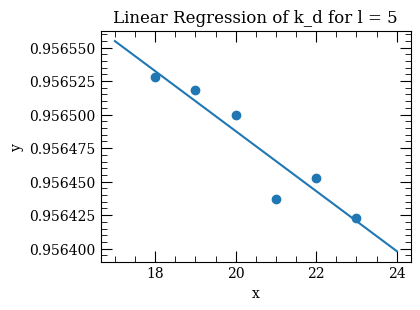

In [16]:
y = np.array([0.956528, 0.956518, 0.956500, 0.956437, 0.956453, 0.956423])
y = y.reshape(-1, 1)  # transforme en tableau (n, 1)

x = np.array([18, 19, 20, 21, 22, 23])
x = x.reshape(-1, 1)  # transforme en tableau (n, 1)


model = LinearRegression()
model.fit(x, y)

x_new = np.linspace(17, 24)
y_new = model.predict(x_new[:, np.newaxis])

plt.figure(figsize=(4, 3))
ax = plt.axes()
ax.scatter(x, y)
ax.plot(x_new, y_new)

ax.set_xlabel('x')
ax.set_ylabel('y')

ax.axis('tight')
plt.title("Linear Regression of k_d for l = 5")
plt.show()

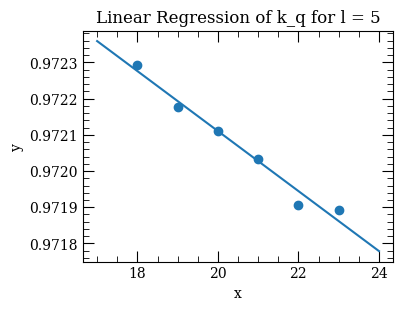

In [17]:
y = np.array([0.972293, 0.972178, 0.972111, 0.972033, 0.971906, 0.971892])
y = y.reshape(-1, 1)  # transforme en tableau (n, 1)

x = np.array([18, 19, 20, 21, 22, 23])
x = x.reshape(-1, 1)  # transforme en tableau (n, 1)


model = LinearRegression()
model.fit(x, y)

x_new = np.linspace(17, 24)
y_new = model.predict(x_new[:, np.newaxis])

plt.figure(figsize=(4, 3))
ax = plt.axes()
ax.scatter(x, y)
ax.plot(x_new, y_new)

ax.set_xlabel('x')
ax.set_ylabel('y')

ax.axis('tight')
plt.title("Linear Regression of k_d for l = 6")
plt.show()

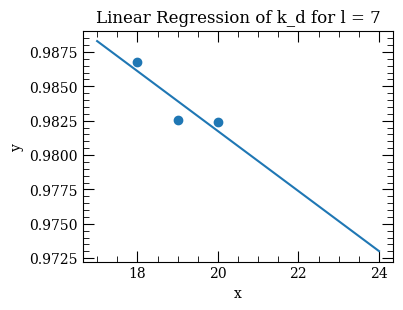

In [19]:
y = np.array([0.98680, 0.982543, 0.982437])
y = y.reshape(-1, 1)  # transforme en tableau (n, 1)

x = np.array([18, 19, 20])
x = x.reshape(-1, 1)  # transforme en tableau (n, 1)


model = LinearRegression()
model.fit(x, y)

x_new = np.linspace(17, 24)
y_new = model.predict(x_new[:, np.newaxis])

plt.figure(figsize=(4, 3))
ax = plt.axes()
ax.scatter(x, y)
ax.plot(x_new, y_new)

ax.set_xlabel('x')
ax.set_ylabel('y')

ax.axis('tight')
plt.title("Linear Regression of k_d for l = 7")
plt.show()

In [ ]:
## on a un range pour les valeurs de a_d et a_q, donc faudra faire des tests pour voir ce qui semble ok ou pas. Voir faire plusieurs fois les calculs et voir tout ce qui pourrait se passer, a quel point un calcul est affecte par tel ou telle valeur choisi des coeff. (difference d'ordre de grandeur ?)